# Drills - Basic Clustering

# Challenge: Boston marathon


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline


import time

from IPython.display import Image
from IPython.display import display
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

In [2]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
df = pd.read_csv(data_path)

## Data Cleaning 

In [3]:
df.memory_usage()

Index            80
10k          255872
name         255872
division     255872
25k          255872
gender       255872
age          255872
official     255872
bib          255872
genderdiv    255872
ctz          255872
35k          255872
overall      255872
pace         255872
state        255872
30k          255872
5k           255872
half         255872
20k          255872
country      255872
city         255872
40k          255872
dtype: int64

In [4]:
display(df.head())

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [6]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [7]:
## Change objects to numeric 
make_num = (['10k','25k','35k','30k','5k','half','20k','40k'])
for col in make_num:
    df[col]= df[col].str.replace('-', '')
    df[col] = pd.to_numeric(df[col])

In [8]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

10k         50
25k        216
ctz      30740
35k         34
state     2576
30k         40
5k          52
half        72
20k         51
city         1
40k         39
dtype: int64

In [9]:
df.shape

(31984, 21)

In [10]:
## Assumption: the Median is a good enough representative of the missing data ## Assump 
## race not filled means its best possible 

## Change objects to numeric 
fill_na = (['10k','25k','35k','30k','5k','half','20k','40k'])
for col in fill_na:
    df[col].fillna(value = df[col].median(), inplace=True)

In [11]:
df.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [12]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

ctz      30740
state     2576
city         1
dtype: int64

We will drop features like 'city', 'name', 'gender', 'bib' and 'country' as they are string of words.  
We will drop the features 'ctz' and 'state' as they are too many missing.  

## Create New Features 

In [13]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.796978,1932.563032,133.580064,42.407079,242.997314,8051.044741,196.848370,15939.587825,9.275658,164.562663,25.754461,111.655934,105.705990,228.989112
std,8.958691,1715.228694,25.513326,11.316496,52.300431,4754.005626,41.957743,9232.978224,1.992486,33.933306,4.324396,21.038253,19.765258,49.131198
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.420000,610.000000,115.570000,33.000000,205.527500,3972.000000,167.150000,7943.750000,7.850000,140.695000,22.650000,96.870000,91.770000,193.830000
50%,50.330000,1425.000000,128.875000,42.000000,232.370000,7970.000000,188.170000,15939.500000,8.870000,157.730000,25.080000,107.830000,102.150000,218.850000
75%,57.150000,2611.000000,147.555000,50.000000,273.235000,11968.000000,220.120000,23935.250000,10.430000,182.785000,28.455000,123.030000,116.480000,257.405000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


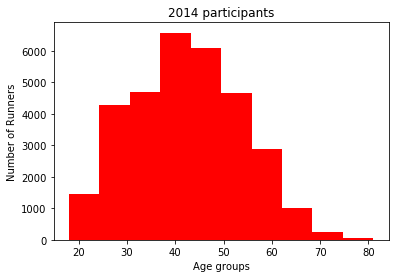

In [14]:
plt.hist(df['age'], color='red', bins = 10)
plt.title('2014 participants') 
plt.xlabel('Age groups')
plt.ylabel('Number of Runners');

In [15]:
df['country'].head()

0    JPN
1    KEN
2    RSA
3    ETH
4    JPN
Name: country, dtype: object

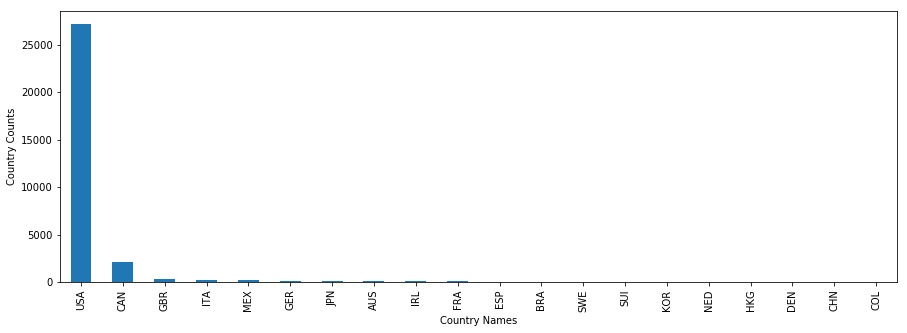

In [16]:
plt.figure(figsize=(15, 5))
df.country.value_counts().head(20).plot(kind='bar')
plt.ylabel('Country Counts')
plt.xlabel('Country Names')
plt.show()

We see that the US and Canada are some of the most popular countries.   
Let's look at the bar count if we remover those two countries.  

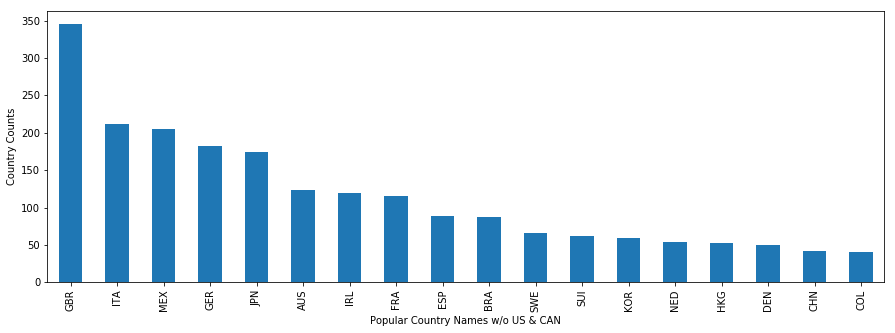

In [17]:
plt.figure(figsize=(15, 5))
df.country.value_counts().head(20)[2:].plot(kind='bar')
plt.ylabel('Country Counts')
plt.xlabel('Popular Country Names w/o US & CAN')
plt.show()

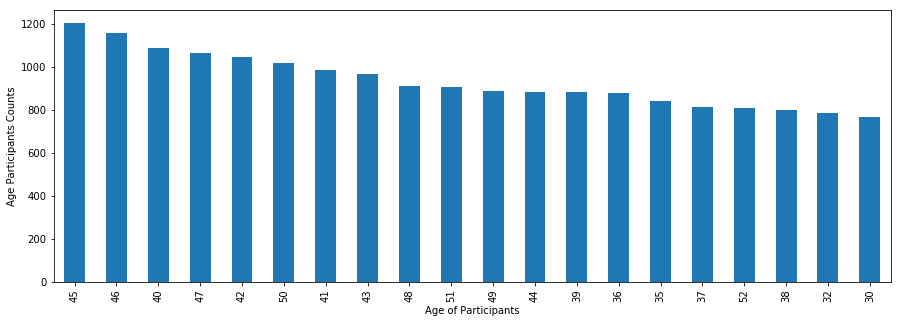

In [18]:
plt.figure(figsize=(15, 5))
df.age.value_counts().head(20).plot(kind='bar')
plt.ylabel('Age Participants Counts')
plt.xlabel('Age of Participants')
plt.show()

We note that there are a lot of people in theor 30s and 40s

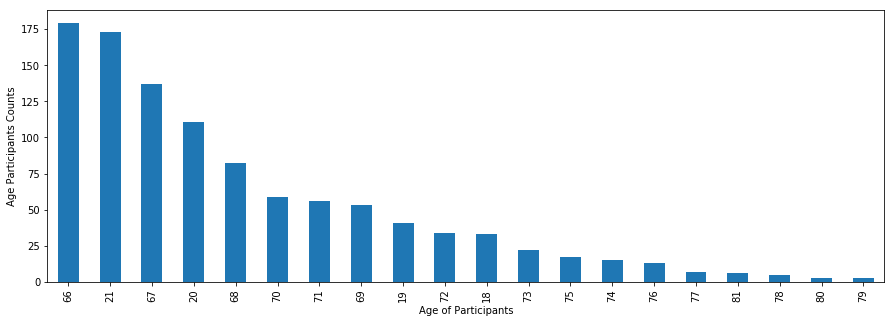

In [19]:
plt.figure(figsize=(15, 5))
df.age.value_counts().tail(20).plot(kind='bar')
plt.ylabel('Age Participants Counts')
plt.xlabel('Age of Participants')
plt.show()

We note there aren't many people of 21 and less and 65 and less.   

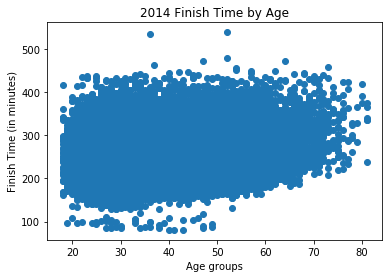

In [20]:
plt.scatter(x = df['age'], y = df['official'])
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age groups')
plt.ylabel('Finish Time (in minutes)');

Can't really say anything from this graph  

In [21]:
##information for participants grouped by age 
df_age = df.groupby(['age'], as_index=False).mean()
display(df_age.head())

,age,10k,division,25k,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,18,53.482727,4112.030303,140.314848,259.760606,9749.484848,208.637273,18714.787879,9.915152,173.231212,26.673030,116.546364,110.351212,244.668485
1,19,51.861220,3902.317073,136.445854,248.249268,9118.024390,201.186341,17407.902439,9.475610,167.979024,25.764634,112.664146,106.679756,234.520000
2,20,52.400450,3788.855856,136.486126,248.792973,8082.234234,201.548288,17106.855856,9.497658,167.733874,26.124414,113.459189,107.455495,235.067928
3,21,50.974220,3618.011561,133.581474,244.774162,7709.664740,198.042023,16149.815029,9.344335,165.094277,25.426243,111.126763,105.195087,231.099769
4,22,51.602393,3472.639286,132.670500,243.639536,7168.828571,196.898464,15677.571429,9.298536,164.573571,25.739464,111.410000,105.510071,229.341929


In [22]:
df_cntry = df.groupby(['country'], as_index=False).mean()
display(df_cntry.head())

,country,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,ARG,45.895333,949.800000,117.000000,43.333333,207.736000,4688.800000,169.384667,8800.000000,7.933333,142.682000,22.826667,98.211333,93.079333,196.066667
1,AUS,48.201694,1363.290323,124.147177,44.564516,223.749274,6738.250000,181.168306,12243.814516,8.542016,151.934677,23.937177,103.609274,98.154274,210.732500
2,AUT,51.590000,1410.954545,135.106818,49.136364,248.881364,9661.090909,201.463182,17593.409091,9.501364,167.414091,25.738636,112.171818,106.046364,234.541364
3,BAH,59.320000,1601.000000,152.040000,45.000000,270.550000,9647.500000,222.380000,23049.500000,10.330000,187.200000,29.735000,126.575000,119.805000,256.065000
4,BAR,55.330000,1489.000000,143.650000,46.000000,256.120000,8677.000000,210.550000,21166.000000,9.780000,174.180000,29.120000,120.380000,114.400000,244.130000


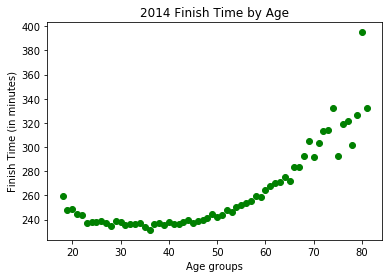

In [23]:
plt.scatter(x = df_age['age'], y = df_age['official'],color = 'green')
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age groups')
plt.ylabel('Finish Time (in minutes)');

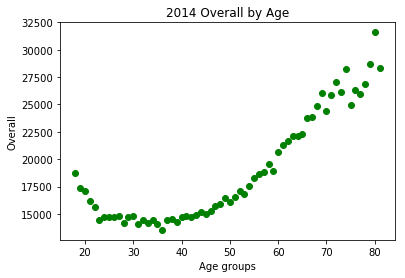

In [24]:
plt.scatter(x = df_age['age'], y = df_age['overall'],color = 'green')
plt.title('2014 Overall by Age') 
plt.xlabel('Age groups')
plt.ylabel('Overall');

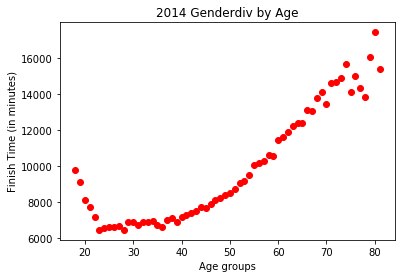

In [25]:
plt.scatter(x = df_age['age'], y = df_age['genderdiv'],color = 'red')
plt.title('2014 Genderdiv by Age') 
plt.xlabel('Age groups')
plt.ylabel('Finish Time (in minutes)');

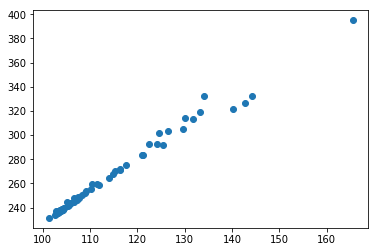

In [26]:
plt.scatter(y = df_age['official'], x = df_age['20k']);

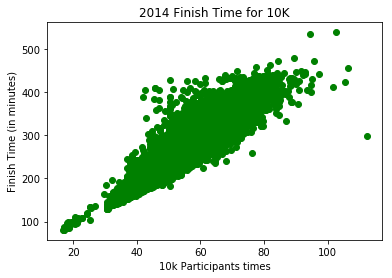

In [27]:
plt.scatter(x = df['10k'], y = df['official'],color = 'green')
plt.title('2014 Finish Time for 10K') 
plt.xlabel('10k Participants times')
plt.ylabel('Finish Time (in minutes)');

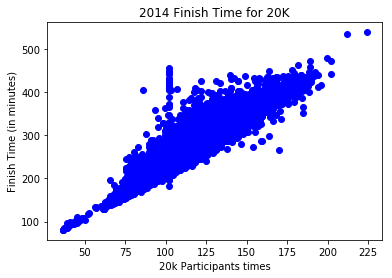

In [28]:
plt.scatter(x = df['20k'], y = df['official'],color = 'blue')
plt.title('2014 Finish Time for 20K') 
plt.xlabel('20k Participants times')
plt.ylabel('Finish Time (in minutes)');

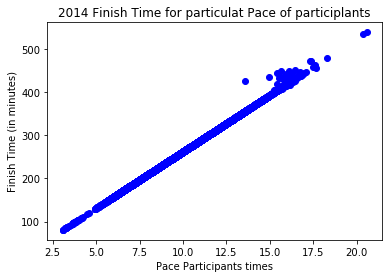

In [29]:
plt.scatter(x = df['pace'], y = df['official'],color = 'blue')
plt.title('2014 Finish Time for particulat Pace of participlants') 
plt.xlabel('Pace Participants times')
plt.ylabel('Finish Time (in minutes)');

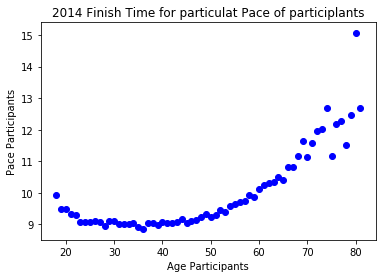

In [30]:
plt.scatter(x = df_age['age'], y = df_age['pace'],color = 'blue')
plt.title('2014 Finish Time for particulat Pace of participlants') 
plt.xlabel('Age Participants')
plt.ylabel('Pace Participants');

In [31]:
display(df.sort_values(['official'], ascending=False).head(10))

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
22197,102.82,"Counihan, Kevin D.",2475,289.020,M,52,538.88,25310,17575,NaN,...,31931,20.57,MA,367.20,46.47,236.67,224.35,USA,Beverly,508.17
28230,94.45,"King, Cedric J.",5911,281.850,M,36,534.22,31764,17574,NaN,...,31930,20.38,MD,376.38,40.75,222.07,211.75,USA,Bethesda,508.35
29525,89.55,"Buccilli, Alfred P.",2474,259.080,M,52,479.80,33159,17573,NaN,...,31929,18.30,MA,324.15,44.95,211.25,199.92,USA,Lynnfield,455.97
22164,84.32,"Bauman, Mark",1112,128.875,M,64,473.17,25269,17572,NaN,...,31928,17.37,MI,311.38,40.78,202.22,189.23,USA,Flint,218.85
22307,95.77,"Flynn, Cheryl A.",2297,128.875,F,47,472.57,25438,14356,NaN,...,31927,17.30,MA,322.28,43.10,213.68,202.07,USA,Concord,218.85
22191,81.80,"Nash, Erica",6979,240.020,F,37,461.87,25304,14355,NaN,...,31926,17.62,WA,300.73,39.00,192.67,181.65,USA,Bellevue,433.28
22289,77.58,"Hoyt, Richard",166,250.580,M,73,457.55,25418,17571,NaN,...,31925,17.47,MA,316.72,33.90,199.97,189.38,USA,Holland,436.57
22530,106.37,"Okrepki, Bruce A.",2473,128.875,M,54,455.65,25684,17570,NaN,...,31924,17.67,LA,157.73,49.63,232.55,102.15,USA,Hammond,218.85
25423,81.03,"Nassif, Julianne",1490,128.875,F,54,451.63,28747,14354,NaN,...,31923,16.45,MA,292.95,39.23,188.50,178.18,USA,Westwood,218.85
26814,91.73,"Domeracki, Henry S.",1778,128.875,M,57,448.92,30240,17569,NaN,...,31922,16.12,TX,157.73,43.90,211.12,102.15,USA,Austin,218.85


In [32]:
display(df.sort_values(['genderdiv'], ascending=True).head(10))

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
124,20.65,"McFadden, Tatyana",1,54.18,F,25,95.10,W101,1,NaN,...,17,3.63,IL,66.48,10.12,45.43,43.12,USA,Champaign,89.87
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
39,30.48,"Keflezighi, Meb",1,76.00,M,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
133,19.75,"Tsuchida, Wakako",2,54.88,F,39,97.40,W105,2,NaN,...,24,3.72,NaN,68.18,9.25,45.42,43.15,JPN,Tama City Tokyo,92.07
17,32.57,"Deba, Buzunesh",2,82.43,F,26,139.98,F10,2,NaN,...,25,5.35,NaN,99.35,16.20,69.47,65.83,ETH,Arsi,132.65
11,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,NaN,...,2,4.92,NaN,92.52,15.18,64.87,61.63,KEN,Marakwet,121.95
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
20,30.50,"Chepkwony, Frankline",3,76.95,M,29,128.83,11,3,NaN,...,3,4.92,NaN,92.52,15.18,64.90,61.63,KEN,Koibatek,122.22


## Features Engineering

In [33]:
## Create Feature that Separate Countries from the US and other 
df['US'] = np.where(df['country'] == 'USA', 1, 0)
df['Female'] = np.where(df['gender'] == 'F', 1, 0)
df['Male'] = np.where(df['gender'] == 'M', 1, 0)

In [34]:
## Create Features that separate by age    
df['18_to_30'] = np.where((df['age'] == 18) & (df['age'] <= 30), 1, 0)
df['31_to_40'] = np.where((df['age'] == 31) & (df['age'] <= 40), 1, 0)
df['41_to_50'] = np.where((df['age'] == 41) & (df['age'] <= 50), 1, 0)
df['51_to_60'] = np.where((df['age'] == 51) & (df['age'] <= 60), 1, 0)
df['60_plus'] = np.where(df['age'] > 60, 1, 0)

In [35]:
## Create Features that separate by overall placements   
df['top_20'] = np.where((df['overall'] == 1) & (df['age'] <= 20), 1, 0)
df['top_50'] = np.where((df['overall'] == 1) & (df['age'] <= 50), 1, 0)
df['top_100'] = np.where((df['overall'] == 1) & (df['age'] <= 100), 1, 0)

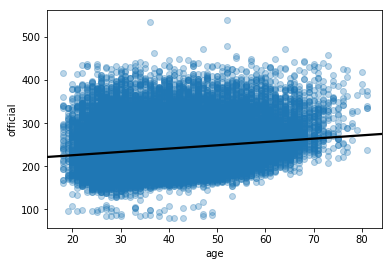

In [36]:
sns.regplot(
    df['age'],
    y=df['official'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

df['Age_official'] = df['official'] / df['age']

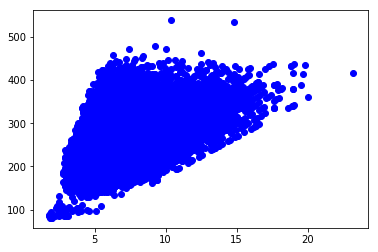

In [37]:
plt.scatter(x = df['Age_official'], y = df['official'],color = 'blue')

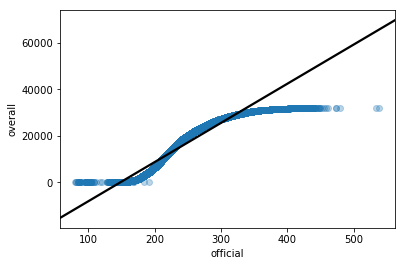

In [38]:
sns.regplot(
    df['official'],
    y=df['overall'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

df['overall_official'] = df['official'] / df['overall']

In [39]:
df['overall_official'].describe()

count    31984.000000
mean         0.068883
std          1.096843
min          0.011006
25%          0.011631
50%          0.014582
75%          0.025873
max        128.620000
Name: overall_official, dtype: float64

In [40]:
display(df.head())

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,18_to_30,31_to_40,41_to_50,51_to_60,60_plus,top_20,top_50,top_100,Age_official,overall_official
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,0,0,0,0,0,0,0,0,1.813830,10.656250
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,0,0,0,0,0,0,0,0,4.210606,6.616667
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,0,0,1,0,0,0,1,1,1.965854,80.600000
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,0,0,0,0,0,0,0,0,5.857500,5.206667
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,0,0,0,0,0,0,0,0,2.030750,40.615000


In [41]:
display(df.head())

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,18_to_30,31_to_40,41_to_50,51_to_60,60_plus,top_20,top_50,top_100,Age_official,overall_official
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,0,0,0,0,0,0,0,0,1.813830,10.656250
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,0,0,0,0,0,0,0,0,4.210606,6.616667
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,0,0,1,0,0,0,1,1,1.965854,80.600000
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,0,0,0,0,0,0,0,0,5.857500,5.206667
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,0,0,0,0,0,0,0,0,2.030750,40.615000


In [42]:
display(df.tail())

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,18_to_30,31_to_40,41_to_50,51_to_60,60_plus,top_20,top_50,top_100,Age_official,overall_official
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,...,0,0,0,0,0,0,0,0,6.617188,0.021500
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,...,0,0,0,0,0,0,0,0,8.897647,0.011018
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,...,0,0,0,0,0,0,0,0,13.428571,0.011239
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,...,0,0,0,0,0,0,0,0,7.966579,0.011018
31983,53.63,"Kirchner, Jeffrey T.",1396,135.02,M,54,228.30,35912,9771,NaN,...,0,0,0,0,0,0,0,0,4.227778,0.015380


In [43]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k', 'US', 'Female', 'Male',
       '18_to_30', '31_to_40', '41_to_50', '51_to_60', '60_plus', 'top_20',
       'top_50', 'top_100', 'Age_official', 'overall_official'],
      dtype='object')

## Split into training and Test Set 

In [44]:
# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = df.drop(['gender','name','bib', 'ctz', 'state', 'country', 'city'],1)
y = df['gender']

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5)

In [45]:
display(X_train.head())


,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,...,18_to_30,31_to_40,41_to_50,51_to_60,60_plus,top_20,top_50,top_100,Age_official,overall_official
27482,65.68,5678,173.37,27,297.65,11765,244.90,27009,11.37,208.32,...,0,0,0,0,0,0,0,0,11.024074,0.011020
2893,41.02,114,104.17,34,180.57,137,149.00,2461,6.90,126.57,...,0,0,0,0,0,0,0,0,5.310882,0.073373
6587,43.13,1541,111.55,43,217.97,8443,171.93,11778,8.32,139.97,...,0,0,0,0,0,0,0,0,5.069070,0.018507
28142,59.53,1178,154.40,51,288.82,11243,232.12,25970,11.02,192.62,...,0,0,0,1,0,0,0,0,5.663137,0.011121
2936,42.32,2861,111.12,22,198.28,5200,161.47,5997,7.57,135.98,...,0,0,0,0,0,0,0,0,9.012727,0.033063


In [46]:
X_train.dtypes

10k                 float64
division              int64
25k                 float64
age                   int64
official            float64
genderdiv             int64
35k                 float64
overall               int64
pace                float64
30k                 float64
5k                  float64
half                float64
20k                 float64
40k                 float64
US                    int64
Female                int64
Male                  int64
18_to_30              int64
31_to_40              int64
41_to_50              int64
51_to_60              int64
60_plus               int64
top_20                int64
top_50                int64
top_100               int64
Age_official        float64
overall_official    float64
dtype: object

## Clustering Methods

### K-Means 

In [47]:
start_time = time.clock()

# Calculate predicted values.
km = KMeans(n_clusters=2).fit(X_train)
y_train_pred = km.predict(X_train)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y_train, y_train_pred))



Runtime for KMeans: 1.1005570000000002 seconds

Comparing k-means clusters against the training set data:
col_0      0     1
gender            
F       3224  4047
M       4993  3728


When comparing between US and Non US
For n = 2  
992 Non US are in Cluster 0 and 1379 are misassigned to cluster 1     
6862 US Citizen in Cluster 0 and 67538 are misassigned to cluster 1      

__For Clustering between Man and Women__

col_0      0     1    
gender            
F       3224  4047      
M       4993  3728       

In [48]:
n_clusters = (2,4,6,10,20,30,50)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    model = KMeans(n_clusters=n, random_state=None).fit(X_train)
    labels = model.labels_
    print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

Number of estimated clusters: 2
0.576257237547
Number of estimated clusters: 4
0.439121252489
Number of estimated clusters: 6
0.3541571585
Number of estimated clusters: 10
0.398819248195
Number of estimated clusters: 20
0.409538990021
Number of estimated clusters: 30
0.43276346707
Number of estimated clusters: 50
0.451402453627


__For Clustering between Man and Women__

Number of estimated clusters: 2      
0.576257237547    
Number of estimated clusters: 4   
0.439121252489    
Number of estimated clusters: 6    
0.3541571585     
Number of estimated clusters: 10    
0.398819248195      
Number of estimated clusters: 20      
0.409538990021    
Number of estimated clusters: 30   
0.43276346707   
Number of estimated clusters: 50   
0.451402453627    


#### ARI for K-Means 

In [49]:
from sklearn import metrics


print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  y_train_pred))



ARI for  Training set data: 
0.0169801981641


No better than randomness.

__For Clustering between Man and Women__   
ARI for  Training set data:   
0.0169801981641   

### Mean-shift

In [50]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
#bandwidth = estimate_bandwidth(X_train.index.tolist(), quantile=0.2)

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
print("bandwidth: {}".format(bandwidth))
#bandwidth = 0.3
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X_train)
labels = model.labels_
cluster_centers = model.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))
print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

bandwidth: 5345.773967882073
Number of estimated clusters: 3
0.496301236979


__For Clustering between Man and Women__ 

bandwidth: 5345.773967882073    
Number of estimated clusters: 3    
0.496301236979    

In [51]:
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Comparing the assigned categories to the ones in the data:
col_0      0     1     2
gender                  
F       1447  3009  2815
M       3512  2371  2838


__For Clustering between Man and Women__     
It looks like only cluster 0 gives a good separation between Men and Women


col_0      0     1     2    
gender                  
F       1447  3009  2815     
M       3512  2371  2838       

#### ARI for Mean-shift

In [ ]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y_train, labels)

0.030874342043734081

No better than randomness.     
__For Clustering between Man and Women__   
0.030874342043734081


### Spectral Cluster 

In [ ]:
from sklearn.cluster import SpectralClustering

n_clusters = (2,4,6,10)  # took out 20, 30, 50 as this takes forever
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    sc = SpectralClustering(n_clusters=n)
    sc.fit(X_train)
    labels = model.labels_
    print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

Number of estimated clusters: 2


In [ ]:
from sklearn.cluster import SpectralClustering

# We know we're looking for two clusters.
n_clusters=2

start_time = time.clock()
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
train_predict=sc.fit_predict(X_train)



print('Runtime for Spectral Cluster: '+'%s seconds'% (time.clock() - start_time))

print('\nComparing the assigned categories to the ones in the Training set data:')
print(pd.crosstab(y_train,train_predict))


The clusters weren't able to make any distinction between men and women.    
Unless you look at cluster 1 that contains 2 women.    

### Affinity propagation 

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

start_time = time.clock()
#Predicted clusters.
predict=af.fit_predict(X_train)

print('Runtime for Affinity propagation: '+'%s seconds'% (time.clock() - start_time))

print('Estimated number of clusters: {}'.format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

This Takes too long to run

#### ARI for Affinity Propagation 

In [ ]:
from sklearn import metrics


print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  y_train_pred))


No better than randomness.

#### Silhouette for Affinity Propagation

In [ ]:
from sklearn.metrics import pairwise_distances

labels = km.labels_
print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

How different are our clusters from each other?   
They are somewhat different.   